# Multi Variate Analysis 
This jupyter python notebook conducts multi variate analysis relevant to the research question. The research questions is as follows: <br>
<br>
How different variables such as **actual delivery time**, **the difference between actual and estimated wait time**, **freight value**, **payment value**, **payment installment** affect the **review score** in each of the different **product type categories**, `Houseware`, `auto`, `furniture decor`, `computer accessories`, `health beauty`, `sports leisure`? <br>

However, in this python notebook, random forest is used to help better the machine learning. Decision tree is not the best solution as seen in part 5. A decision tree is a single classification tree. A random forest on the other hand is a "forest", a multitude of classification trees. The random forest algorithm then decides which is the best tree with the lowest error rates. 
https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm 


### Extracting the necessary CSVs provided

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
olist_orders_dataset = pd.read_csv("olist_orders_dataset.csv")
olist_order_reviews_dataset = pd.read_csv("olist_order_reviews_dataset.csv")
olist_order_payments_dataset = pd.read_csv("olist_order_payments_dataset.csv")
olist_order_items_dataset = pd.read_csv("olist_order_items_dataset.csv")
olist_products_dataset = pd.read_csv("olist_products_dataset.csv")
product_category_name_translation = pd.read_csv("product_category_name_translation.csv")

### Merging the Datasets

In [3]:
olist_merge = olist_orders_dataset.merge(olist_order_reviews_dataset, on="order_id", how = 'left')
olist_merge = olist_merge.merge(olist_order_payments_dataset, on="order_id", how = 'left')
olist_merge = olist_merge.merge(olist_order_items_dataset, on="order_id", how = 'left')
olist_merge = olist_merge.merge(olist_products_dataset, on="product_id", how = 'left')

### Removing Duplicates and extracting needed variables 

In [4]:
olist_merge.drop_duplicates(subset=["review_score", "order_id"], inplace = True)

In [5]:
olist_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99650 entries, 0 to 119150
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99650 non-null  object 
 1   customer_id                    99650 non-null  object 
 2   order_status                   99650 non-null  object 
 3   order_purchase_timestamp       99650 non-null  object 
 4   order_approved_at              99490 non-null  object 
 5   order_delivered_carrier_date   97860 non-null  object 
 6   order_delivered_customer_date  96672 non-null  object 
 7   order_estimated_delivery_date  99650 non-null  object 
 8   review_id                      99650 non-null  object 
 9   review_score                   99650 non-null  int64  
 10  review_comment_title           11704 non-null  object 
 11  review_comment_message         41646 non-null  object 
 12  review_creation_date           99650 non-null

In [6]:
dataAnalysis = pd.DataFrame(olist_merge[['order_status','order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_score', 'payment_installments', 'payment_value', 'freight_value', 'product_category_name']])

In [7]:
dataAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99650 entries, 0 to 119150
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   99650 non-null  object 
 1   order_purchase_timestamp       99650 non-null  object 
 2   order_approved_at              99490 non-null  object 
 3   order_delivered_customer_date  96672 non-null  object 
 4   order_estimated_delivery_date  99650 non-null  object 
 5   review_score                   99650 non-null  int64  
 6   payment_installments           99649 non-null  float64
 7   payment_value                  99649 non-null  float64
 8   freight_value                  98874 non-null  float64
 9   product_category_name          97454 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 8.4+ MB


In [8]:
# Creating a list of the time related variables 
time = ["order_purchase_timestamp","order_estimated_delivery_date","order_delivered_customer_date", "order_approved_at"]
# Changing the time related variables to datetime format using the list 
for column in time:
    dataAnalysis.loc[:, column] = pd.to_datetime(dataAnalysis[column])

In [9]:
# Calculating the actual wait time    
dataAnalysis.loc[:,"actual_wait_time"] = (dataAnalysis['order_delivered_customer_date']-dataAnalysis['order_purchase_timestamp']).dt.days

In [10]:
# Calculating the estimated wait time 
dataAnalysis.loc[:,"estimated_wait_time"] = (dataAnalysis['order_estimated_delivery_date']-dataAnalysis['order_purchase_timestamp']).dt.days

In [11]:
#Actual minus estimated wait time 
dataAnalysis.loc[:,"actualxestimated"] = (dataAnalysis['actual_wait_time']-dataAnalysis['estimated_wait_time'])

In [12]:
dataAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99650 entries, 0 to 119150
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_status                   99650 non-null  object        
 1   order_purchase_timestamp       99650 non-null  datetime64[ns]
 2   order_approved_at              99490 non-null  datetime64[ns]
 3   order_delivered_customer_date  96672 non-null  datetime64[ns]
 4   order_estimated_delivery_date  99650 non-null  datetime64[ns]
 5   review_score                   99650 non-null  int64         
 6   payment_installments           99649 non-null  float64       
 7   payment_value                  99649 non-null  float64       
 8   freight_value                  98874 non-null  float64       
 9   product_category_name          97454 non-null  object        
 10  actual_wait_time               96672 non-null  float64       
 11  estimated_wait

In [13]:
dataAnalysis.drop(columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'estimated_wait_time'], inplace = True)

In [14]:
dataAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99650 entries, 0 to 119150
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_status           99650 non-null  object 
 1   review_score           99650 non-null  int64  
 2   payment_installments   99649 non-null  float64
 3   payment_value          99649 non-null  float64
 4   freight_value          98874 non-null  float64
 5   product_category_name  97454 non-null  object 
 6   actual_wait_time       96672 non-null  float64
 7   actualxestimated       96672 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 6.8+ MB


### Further analysis of predictors
Categorical types: Order Status
<br>
Numerical types: payment installments, payment value, freight value, actual wait time, actualxestimated 

When conducting multi variate analysis, it is important to know which variables are categorical and which are numerical. 

The numerical types are dependent on the order status being delivered. Hence, it needs to be filtered. 

In [15]:
dataAnalysis = dataAnalysis.loc[(dataAnalysis["order_status"]=="delivered")]

In [16]:
dataAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96674 entries, 0 to 119150
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_status           96674 non-null  object 
 1   review_score           96674 non-null  int64  
 2   payment_installments   96673 non-null  float64
 3   payment_value          96673 non-null  float64
 4   freight_value          96674 non-null  float64
 5   product_category_name  95312 non-null  object 
 6   actual_wait_time       96666 non-null  float64
 7   actualxestimated       96666 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 6.6+ MB


### Class balancing for review score into low and high review score 
Review score 1 and 2 classified as low (0) <br>
Review score 3 to 5 classified as high (1)

This is to reduce the class imbalance seen. 
Additionally, based on the predictor single variate analysis done in previous parts, this split seems best. 

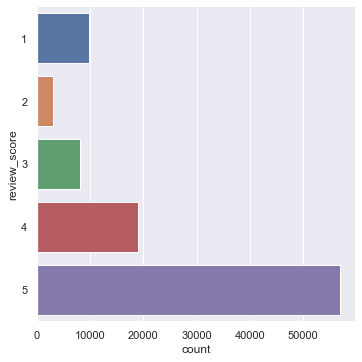

In [17]:
sb.catplot(y = "review_score", data = dataAnalysis, kind = "count")

From the above graph, the review score of 5 is significantly in larger numbers than the other review score. 
The review score is floor divided by 3.5. This is because 
1//3 = 0 <br>
2//3 = 0 <br>
3//3 = 1 <br>
4//3 = 1 <br>
5//3 = 1 <br>
This allows us to not use a if statement which can help reduce time complexity. 

In [18]:
# Calculating the actual wait time    
dataAnalysis.loc[:,"reviewscore"] = dataAnalysis["review_score"]//4

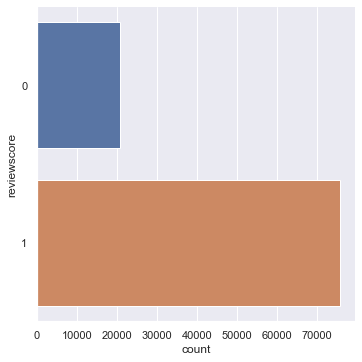

In [19]:
sb.catplot(y = "reviewscore", data = dataAnalysis, kind = "count")

The data is still imbalanced. However, it will be further balanced after being split into the different top ten product categories. 

In [20]:
# Original review score no longer needed
dataAnalysis.drop(columns = ['review_score'], inplace = True)

#### Next, narrowing down to the top ten products
`Houseware`, `auto`, `furniture decor`, `computer accessories`, `health beauty`, `sports leisure`

In [21]:
#merging with english name first 
dataAnalysis = pd.merge(dataAnalysis,product_category_name_translation,how="left",on="product_category_name")

In [22]:
dataAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96674 entries, 0 to 96673
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   96674 non-null  object 
 1   payment_installments           96673 non-null  float64
 2   payment_value                  96673 non-null  float64
 3   freight_value                  96674 non-null  float64
 4   product_category_name          95312 non-null  object 
 5   actual_wait_time               96666 non-null  float64
 6   actualxestimated               96666 non-null  float64
 7   reviewscore                    96674 non-null  int64  
 8   product_category_name_english  95293 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 7.4+ MB


In [23]:
housewareProd = dataAnalysis.loc[(dataAnalysis["product_category_name_english"]=="housewares")]

# Defining a balance function to balance the two classes
def balancing(dataframe):
    # Class count
    count_class_1, count_class_0 = dataframe.reviewscore.value_counts() #split the dataframe based on review scores into 1 and 0

    # Divide by class 1 and 0 to create two different dataframes
    df_class_0 = dataframe[dataframe['reviewscore'] == 0] 
    df_class_1 = dataframe[dataframe['reviewscore'] == 1]

    #Sample the class 0 (review score 0) by the number of review 1s
    df_class_0_over = df_class_0.sample(count_class_1, replace=True)
    dataframe = pd.concat([df_class_1, df_class_0_over], axis=0)
    return dataframe #return the dataframe

housewareProd = balancing(housewareProd)
housewareProd.info()
# since there is no null values, no further cleaning is required. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9062 entries, 0 to 37917
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   9062 non-null   object 
 1   payment_installments           9062 non-null   float64
 2   payment_value                  9062 non-null   float64
 3   freight_value                  9062 non-null   float64
 4   product_category_name          9062 non-null   object 
 5   actual_wait_time               9062 non-null   float64
 6   actualxestimated               9062 non-null   float64
 7   reviewscore                    9062 non-null   int64  
 8   product_category_name_english  9062 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 708.0+ KB


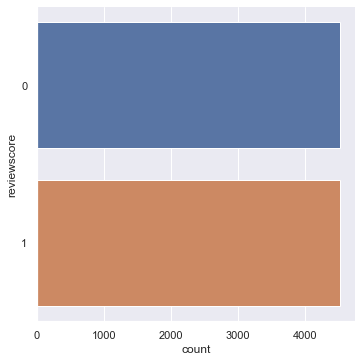

In [24]:
sb.catplot(y = "reviewscore", data = housewareProd, kind = "count") #double check if the classes are balanced. 

In [25]:
autoProd = dataAnalysis.loc[(dataAnalysis["product_category_name_english"]=="auto")]
autoProd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3797 entries, 2 to 96645
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   3797 non-null   object 
 1   payment_installments           3797 non-null   float64
 2   payment_value                  3797 non-null   float64
 3   freight_value                  3797 non-null   float64
 4   product_category_name          3797 non-null   object 
 5   actual_wait_time               3796 non-null   float64
 6   actualxestimated               3796 non-null   float64
 7   reviewscore                    3797 non-null   int64  
 8   product_category_name_english  3797 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 296.6+ KB


In [26]:
#Needs cleaning and removal of null values 
autoProd = autoProd.loc[(autoProd["actual_wait_time"].notnull())]
autoProd.info()
autoProd=balancing(autoProd)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3796 entries, 2 to 96645
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   3796 non-null   object 
 1   payment_installments           3796 non-null   float64
 2   payment_value                  3796 non-null   float64
 3   freight_value                  3796 non-null   float64
 4   product_category_name          3796 non-null   object 
 5   actual_wait_time               3796 non-null   float64
 6   actualxestimated               3796 non-null   float64
 7   reviewscore                    3796 non-null   int64  
 8   product_category_name_english  3796 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 296.6+ KB


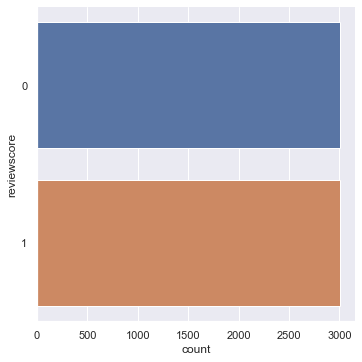

In [27]:
sb.catplot(y = "reviewscore", data = autoProd, kind = "count")

In [28]:
#No need further cleaning
furnitureProd = dataAnalysis.loc[(dataAnalysis["product_category_name_english"]=="furniture_decor")]
furnitureProd.info()

furnitureProd = balancing(furnitureProd)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6238 entries, 7 to 96668
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   6238 non-null   object 
 1   payment_installments           6238 non-null   float64
 2   payment_value                  6238 non-null   float64
 3   freight_value                  6238 non-null   float64
 4   product_category_name          6238 non-null   object 
 5   actual_wait_time               6238 non-null   float64
 6   actualxestimated               6238 non-null   float64
 7   reviewscore                    6238 non-null   int64  
 8   product_category_name_english  6238 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 487.3+ KB


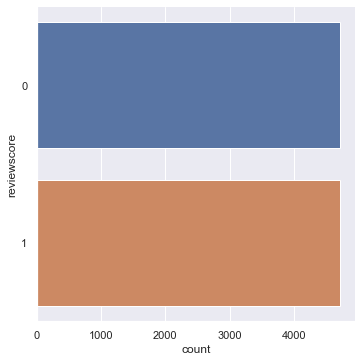

In [29]:
sb.catplot(y = "reviewscore", data = furnitureProd, kind = "count")

In [30]:
CompAcProd = dataAnalysis.loc[(dataAnalysis["product_category_name_english"]=="computers_accessories")]
CompAcProd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6522 entries, 10 to 96672
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   6522 non-null   object 
 1   payment_installments           6522 non-null   float64
 2   payment_value                  6522 non-null   float64
 3   freight_value                  6522 non-null   float64
 4   product_category_name          6522 non-null   object 
 5   actual_wait_time               6521 non-null   float64
 6   actualxestimated               6521 non-null   float64
 7   reviewscore                    6522 non-null   int64  
 8   product_category_name_english  6522 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 509.5+ KB


In [31]:
#Needs cleaning and removal of null values 
CompAcProd = CompAcProd.loc[(CompAcProd["actual_wait_time"].notnull())]
CompAcProd.info()
CompAcProd=balancing(CompAcProd)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6521 entries, 10 to 96672
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   6521 non-null   object 
 1   payment_installments           6521 non-null   float64
 2   payment_value                  6521 non-null   float64
 3   freight_value                  6521 non-null   float64
 4   product_category_name          6521 non-null   object 
 5   actual_wait_time               6521 non-null   float64
 6   actualxestimated               6521 non-null   float64
 7   reviewscore                    6521 non-null   int64  
 8   product_category_name_english  6521 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 509.5+ KB


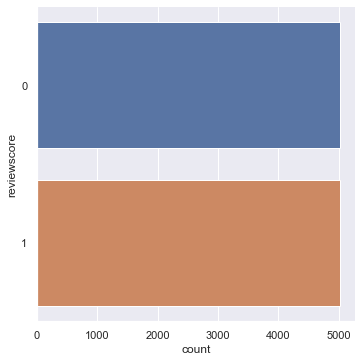

In [32]:
sb.catplot(y = "reviewscore", data = CompAcProd, kind = "count")

In [33]:
healthProd = dataAnalysis.loc[(dataAnalysis["product_category_name_english"]=="health_beauty")]
healthProd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8621 entries, 19 to 96673
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   8621 non-null   object 
 1   payment_installments           8620 non-null   float64
 2   payment_value                  8620 non-null   float64
 3   freight_value                  8621 non-null   float64
 4   product_category_name          8621 non-null   object 
 5   actual_wait_time               8621 non-null   float64
 6   actualxestimated               8621 non-null   float64
 7   reviewscore                    8621 non-null   int64  
 8   product_category_name_english  8621 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 673.5+ KB


In [34]:
#Needs further cleaning 
healthProd = healthProd.loc[(healthProd["payment_installments"].notnull())]
healthProd.info()
healthProd=balancing(healthProd)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8620 entries, 19 to 96673
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   8620 non-null   object 
 1   payment_installments           8620 non-null   float64
 2   payment_value                  8620 non-null   float64
 3   freight_value                  8620 non-null   float64
 4   product_category_name          8620 non-null   object 
 5   actual_wait_time               8620 non-null   float64
 6   actualxestimated               8620 non-null   float64
 7   reviewscore                    8620 non-null   int64  
 8   product_category_name_english  8620 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 673.4+ KB


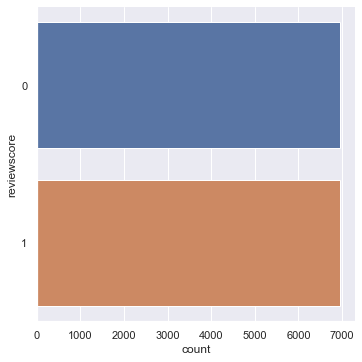

In [35]:
sb.catplot(y = "reviewscore", data = healthProd, kind = "count")

In [36]:
sportsProd = dataAnalysis.loc[(dataAnalysis["product_category_name_english"]=="sports_leisure")]
sportsProd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7504 entries, 41 to 96663
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   7504 non-null   object 
 1   payment_installments           7504 non-null   float64
 2   payment_value                  7504 non-null   float64
 3   freight_value                  7504 non-null   float64
 4   product_category_name          7504 non-null   object 
 5   actual_wait_time               7503 non-null   float64
 6   actualxestimated               7503 non-null   float64
 7   reviewscore                    7504 non-null   int64  
 8   product_category_name_english  7504 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 586.2+ KB


In [37]:
#Needs further cleaning 
sportsProd = sportsProd.loc[(sportsProd["actual_wait_time"].notnull())]
sportsProd.info()
sportsProd=balancing(sportsProd)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7503 entries, 41 to 96663
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   7503 non-null   object 
 1   payment_installments           7503 non-null   float64
 2   payment_value                  7503 non-null   float64
 3   freight_value                  7503 non-null   float64
 4   product_category_name          7503 non-null   object 
 5   actual_wait_time               7503 non-null   float64
 6   actualxestimated               7503 non-null   float64
 7   reviewscore                    7503 non-null   int64  
 8   product_category_name_english  7503 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 586.2+ KB


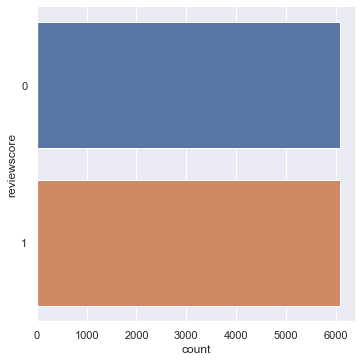

In [38]:
sb.catplot(y = "reviewscore", data = sportsProd, kind = "count")

#### Desicion tree on the product types 
`Houseware`, `auto`, `furniture decor`, `computer accessories`, `health beauty`, `sports leisure`

In [39]:
def train_and_predict(dataframe):
    # Import essential models and functions from sklearn
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix

    # Extract Response and Predictors
    y = pd.DataFrame(dataframe['reviewscore'])
    X = pd.DataFrame(dataframe[["payment_installments", "payment_value", "freight_value", "actual_wait_time", "actualxestimated"]]) 

    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    # Import RandomForestClassifier model from Scikit-Learn
    from sklearn.ensemble import RandomForestClassifier

    # Create the Random Forest object
    rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                     max_depth = 10)       # set the maximum depth of each tree

    # Fit Random Forest on Train Data
    rforest.fit(X_train, y_train.reviewscore.ravel())

    # Predict the Response corresponding to Predictors
    y_train_pred = rforest.predict(X_train)
    y_test_pred = rforest.predict(X_test)
    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model: Train Dataset")
    print("Classification Accuracy : ", rforest.score(X_train, y_train))
    confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
    TN = confusion_matrix_train[0,0]
    TP = confusion_matrix_train[1,1]
    FP = confusion_matrix_train[0,1]
    FN = confusion_matrix_train[1,0]
    print("True Negative Rate      : ", TN/(TN+FP))
    print("True Positive Rate      : ", TP/(TP+FN))
    print("False Negative Rate     : ", FN/(FN+TP))
    print("False Positive Rate     : ", FP/(TN+FP))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model: Test Dataset")
    print("Classification Accuracy : ", rforest.score(X_test, y_test))
    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
    TN = confusion_matrix_test[0,0]
    TP = confusion_matrix_test[1,1]
    FP = confusion_matrix_test[0,1]
    FN = confusion_matrix_test[1,0]
    print("True Negative Rate      : ", TN/(TN+FP))
    print("True Positive Rate      : ", TP/(TP+FN))
    print("False Negative Rate     : ",FN/(FN+TP))
    print("False Positive Rate     : ", FP/(TN+FP))

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Check Point: Analysis 


There is a significant improvement in the performance of the machine learning model when using random forest as opposed to using decision tree. The classification accuracy increases to almost 80% for most product types. Additionally, the false positive rates drop below 30%. However, more can be done to find the hyperparameters which results in the most accurate random forest model being made. 

**Hyperparameters** 
Hyperparameters in this case is the `n_estimators` and the `max_depth` which is the number of decision trees in the forest and the maximum depth each tree respectively. Grid Search is used to find the best hyperparameters. 

In [40]:
def best_hyperparameter(dataframe):
    # Import essential models and functions from sklearn
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix
    # Import RandomForestClassifier model from Scikit-Learn
    from sklearn.ensemble import RandomForestClassifier

    # Extract Response and Predictors
    y = pd.DataFrame(dataframe['reviewscore'])
    X = pd.DataFrame(dataframe[["payment_installments", "payment_value", "freight_value", "actual_wait_time", "actualxestimated"]]) 

    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    # Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
    from sklearn.model_selection import GridSearchCV

    # Define the Hyper-parameter Grid to search on, in case of Random Forest
    param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
                  'max_depth': np.arange(9, 14)}             # depth of trees 2, 3, 4, 5, ..., 10

    # Create the Hyper-parameter Grid
    hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                          param_grid,                 # the search grid
                          cv = 5,                     # 5-fold cross-validation
                          scoring = 'accuracy')       # score to evaluate

    # Train the models using Cross-Validation
    hpGrid.fit(X_train, y_train.reviewscore.ravel())
    
    # Fetch the best Model or the best set of Hyper-parameters
    print(hpGrid.best_estimator_)

    # Print the score (accuracy) of the best Model after CV
    print(np.abs(hpGrid.best_score_))


In [41]:
best_hyperparameter(furnitureProd)

RandomForestClassifier(max_depth=13, n_estimators=1000)
0.7985309538333951


In [42]:
best_hyperparameter(healthProd)

RandomForestClassifier(max_depth=13, n_estimators=900)
0.8328701485385721


In [43]:
best_hyperparameter(autoProd)

RandomForestClassifier(max_depth=13, n_estimators=400)
0.8611973392461196


In [44]:
best_hyperparameter(CompAcProd)

RandomForestClassifier(max_depth=13, n_estimators=800)
0.7975050119777026


In [45]:
best_hyperparameter(sportsProd)

RandomForestClassifier(max_depth=13, n_estimators=800)
0.8382593218073069


In [46]:
best_hyperparameter(housewareProd)

RandomForestClassifier(max_depth=13, n_estimators=700)
0.824896333809462
